In [1]:
from src.models.high_level_model import HighLevelModel
from src.data.multi_output_dataset import MultiOutputDataModule

import torch
import pytorch_lightning as pl
import matplotlib.pyplot as plt

In [2]:
TYPE_LABELS = [
    "sedan",
    "suv",
    "van",
    "hatchback",
    "mpv",
    "pickup",
    "bus",
    "truck",
    "estate",
    "sportscar",
    "RV",
]

COLOR_LABELS = [
    "yellow",
    "orange",
    "green",
    "gray",
    "red",
    "blue",
    "white",
    "golden",
    "brown",
    "black",
    "purple",
    "pink",
]

SGVEHICLE_CLASSES = [len(COLOR_LABELS), len(TYPE_LABELS)]

In [3]:
model = HighLevelModel.load_from_checkpoint(
    "models/sgvehicle-high-level-model.ckpt",
    task_num_classes=SGVEHICLE_CLASSES,
    map_location="cpu",
)
model = model.eval()

data = MultiOutputDataModule(
    root_dir="data/SGVehicle", batch_size=64, num_workers=0, task_num_classes=SGVEHICLE_CLASSES
)
data.setup()

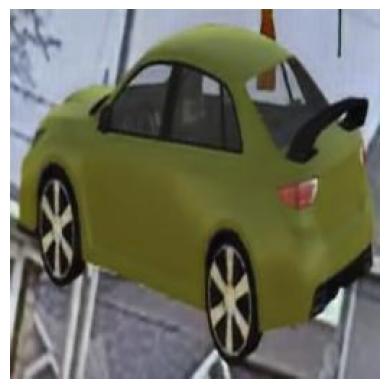

Predicted color: yellow - Ground Truth color: yellow
Predicted type: sedan - Ground Truth type: sedan



In [4]:
for batch in data.val_dataloader():
    # Get the inputs
    x, y = batch[0], batch[1]

    # Forward pass
    with torch.no_grad():
        y_pred = model(x)

    # Plot the image
    plt.imshow(x[0].permute(1, 2, 0))
    plt.axis("off")
    plt.show()

    # Print the predicted and ground truth labels
    print(
        f"Predicted color: {COLOR_LABELS[torch.argmax(y_pred[0][0]).item()]} - Ground Truth color: {COLOR_LABELS[y[0][0].item()]}"
    )
    print(
        f"Predicted type: {TYPE_LABELS[torch.argmax(y_pred[1][0]).item()]} - Ground Truth type: {TYPE_LABELS[y[0][0].item()]}"
    )
    print()
    break

In [5]:
trainer = pl.Trainer(accelerator="gpu")
trainer.test(model, data)

You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/masters-thesis/venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/masters-thesis/venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'test_dataloader' does not have many workers which 

Testing DataLoader 0: 100%|██████████| 76/76 [05:03<00:00,  0.25it/s]Task 0 Accuracy: 0.81
Task 0 F1 Score: 0.81
Task 0 Confusion Matrix:
[[283   0   3   0   0   0   0  89   0   0   1   0]
 [  3 328   0   0   1   0   0  71   2   0   0   0]
 [  2   0 331  30   0  19   1   0   4  17   1   1]
 [  0   0  17 222   0  13  37   0  20 106   0   2]
 [  0   0   0   0 394   0   0   0   4   0   0   4]
 [  0   0  17  28   0 291  12   0   0  31   0   1]
 [  0   1   1  23   1   2 348   0   3   1   0  10]
 [ 95  18   0   0   0   0   0 288  13   0   0   1]
 [  0   4   0  33   2   1   7  17 297  52   1   4]
 [  0   0   1  39   0   2   1   0  12 313   0   0]
 [  0   0   0   0   0   0   0   0   0   0 441   1]
 [  0   0   1   0   3   0  13   0   6   0   0 370]]
Task 1 Accuracy: 0.81
Task 1 F1 Score: 0.81
Task 1 Confusion Matrix:
[[833  19   0  76   0  10   0   0  13 107   0]
 [ 48 388   1  38   0   9   1   6   1  12   3]
 [  0   0 206   2   2   0   0   6   0   0  11]
 [108  25   1 796   0   7   1   0  14  

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric         ┃        DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ test_accuracy (High-level) │     0.8128636479377747     │
│ test_accuracy (Low-level)  │     0.6631338596343994     │
│    test_task_0_accuracy    │     0.8117206692695618     │
│    test_task_0_conf_acc    │     0.8117206692695618     │
│       test_task_0_f1       │     0.8132202625274658     │
│    test_task_1_accuracy    │     0.8140066266059875     │
│    test_task_1_conf_acc    │     0.8140066266059875     │
│       test_task_1_f1       │     0.8131738305091858     │
└────────────────────────────┴────────────────────────────┘

[{'test_task_0_accuracy': 0.8117206692695618,
  'test_task_0_f1': 0.8132202625274658,
  'test_task_0_conf_acc': 0.8117206692695618,
  'test_task_1_accuracy': 0.8140066266059875,
  'test_task_1_f1': 0.8131738305091858,
  'test_task_1_conf_acc': 0.8140066266059875,
  'test_accuracy (Low-level)': 0.6631338596343994,
  'test_accuracy (High-level)': 0.8128636479377747}]